In [9]:
import math
import scipy.stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re


# RCCA Ecological Parameter Statistic Tables

In [15]:
eco_invert_std = pd.read_csv('eco_invert_std.csv')
eco_kelp_std = pd.read_csv('eco_kelp_std.csv')
eco_std = pd.read_csv('eco_std.csv')

eco_invert_std['Date'] = pd.to_datetime(eco_invert_std['Date'])
eco_kelp_std['Date'] = pd.to_datetime(eco_kelp_std['Date'])
eco_std['Date'] = pd.to_datetime(eco_std['Date'])

display(eco_invert_std.head(3), eco_kelp_std.head(3), eco_std.head(3))

,Site,Latitude,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Total_Count_Site,Simpsons,Shannon,Richness,std_Simpsons,std_Shannon,std_Richness
0,120 Reef,33.737919,2006-10-01,2006,Oct,1,Oct-01,732585,274,805,0.704441,1.461121,11,0.566938,0.344281,-0.107075
1,120 Reef,33.737919,2007-08-19,2007,Aug,19,Aug-19,732907,231,969,0.798118,1.890908,15,1.174410,1.512614,1.400993
2,120 Reef,33.737919,2008-08-23,2008,Aug,23,Aug-23,733277,236,730,0.734495,1.601857,13,0.761831,0.726857,0.646959


,Site,Latitude,Date,Year,Total_Count_Site,Simpsons,Shannon,Richness,std_Simpsons,std_Shannon,std_Richness
0,120 Reef,33.737919,2006-10-01,2006,63.0,0.000000,0.000000,1,-1.025408,-1.041572,-1.018754
1,120 Reef,33.737919,2007-08-19,2007,260.0,0.030502,0.088138,3,-0.903931,-0.840117,0.174869
2,120 Reef,33.737919,2008-08-23,2008,713.0,0.000000,0.000000,1,-1.025408,-1.041572,-1.018754


,Site,Latitude,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Total_Count_Site_Invert,...,std_Simpsons_Invert,std_Shannon_Invert,std_Richness_Invert,Total_Count_Site_Kelp,Simpsons_Kelp,Shannon_Kelp,Richness_Kelp,std_Simpsons_Kelp,std_Shannon_Kelp,std_Richness_Kelp
0,120 Reef,33.737919,2006-10-01,2006,Oct,1,Oct-01,732585,274,805,...,0.566938,0.344281,-0.107075,63.0,0.000000,0.000000,1.0,-1.025408,-1.041572,-1.018754
1,120 Reef,33.737919,2007-08-19,2007,Aug,19,Aug-19,732907,231,969,...,1.174410,1.512614,1.400993,260.0,0.030502,0.088138,3.0,-0.903931,-0.840117,0.174869
2,120 Reef,33.737919,2008-08-23,2008,Aug,23,Aug-23,733277,236,730,...,0.761831,0.726857,0.646959,713.0,0.000000,0.000000,1.0,-1.025408,-1.041572,-1.018754


# Statistical Analysis of RCCA Data

Goal 1: Determine if there is a statistically significant difference in means of data before and after 2016

Method: Two-sample t-test

Source: [datacamp](https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests)

$$
t = \frac{\bar{x_1}-\bar{x_2}}{\sqrt{\frac{s_1^2}{N_1}+{\frac{s_2^2}{N_2}}}}
$$


Side Method: Welch's t-test (unequal variances)

$$
df = \frac{(\frac{s_1^2}{N_1}+\frac{s_2^2}{N_2})^2}{\frac{(\frac{s_1^2}{N_1})^2}{N_1 -1}+\frac{(\frac{s_2^2}{N_2})^2}{N_2 -1}}
$$

In [8]:
columns_eco = eco_std.columns
columns_eco

Index(['Site', 'Latitude', 'Date', 'Year', 'Month', 'Day', 'Month_Day',
       'Dateordinal', 'DayofYear', 'Total_Count_Site_Invert',
       'Simpsons_Invert', 'Shannon_Invert', 'Richness_Invert',
       'std_Simpsons_Invert', 'std_Shannon_Invert', 'std_Richness_Invert',
       'Total_Count_Site_Kelp', 'Simpsons_Kelp', 'Shannon_Kelp',
       'Richness_Kelp', 'std_Simpsons_Kelp', 'std_Shannon_Kelp',
       'std_Richness_Kelp'],
      dtype='object')

**For one column: Shannon_Invert**

In [73]:
def t_test_pre_post_diff(dataframe, column, year):
    ## Two Sample T-Test
    ## Null Hypothesis: mu1 = mu2
    ## Alt Hypothesis: mu1 != mu2

    ##Create two series from the columns you want to compare between years
    series_pre2016 = dataframe[dataframe.Year<year][column].dropna()
    series_post2016 = dataframe[dataframe.Year>year][column].dropna()

    ##First column relevant stats
    x1 = series_pre2016.mean()
    sd1 = series_pre2016.std()
    N1 = len(series_pre2016)

    ##Second column relevant stats
    x2 = series_post2016.mean()
    sd2 = series_post2016.std()
    N2 = len(series_post2016)

    ## Calculated t-statistic, degrees of freedom, and p-value for one and two tail distributions
    t_statistic = (x1 - x2)/np.sqrt((sd1**2/N1)+(sd2**2/N2))
    df = (((sd1**2/N1)+(sd2**2/N2))**2)/(((sd1**2/N1)**2/(N1-1)+(sd2**2/N2)**2/(N2-1)))
    p_one_tail = 1 - scipy.stats.t.cdf(abs(t_statistic),df)
    p_two_tail = 2 * p_one_tail

    ## Scipy function t-statistic and p-value for 2 tail distribution
    t_stat, p_value = scipy.stats.ttest_ind(series_pre2016, series_post2016, equal_var=False)

    
    return [[float(t_statistic), float(p_two_tail)],[float(t_stat), float(p_value)]]

<mark style="background-color: lightblue"> **Shannon Diversity for Invertebrates - Difference in Means - 2016** </mark>

In [74]:
t_test_pre_post_diff(eco_std, 'Shannon_Invert', 2016)

[[5.039815131297507, 5.227727557510775e-07],
 [5.039815131297507, 5.227727557674391e-07]]

**P-value for Shannon Diversity Index of RCCA Invertebrates before and after 2016 is 0.00000052277. With this extremely low p-value, *we reject the null hypothesis* of no difference in means before and after 2016, and conclude that there is a statistically significant difference in means between the Shannon Diversity Index of RCCA Invertebrate Surveys.**

<mark style="background-color: lightblue"> **Shannon Diversity for Kelp - Difference in Means - 2016** </mark>

In [75]:
t_test_pre_post_diff(eco_std, 'Shannon_Kelp',2016)

[[-1.13443980398246, 0.2567914838471559],
 [-1.13443980398246, 0.2567914838471558]]

**P-value for Shannon... of RCCA Kelp before and after 2016 is 0.25679. With this high p-value, *we fail to reject the null hypothesis* and conclude there is not enough evidence to support the alternative hypothesis of statistically significant difference in means.** 

<mark style="background-color: lightblue"> **Shannon Diversity for Kelp - Difference in Means - 2017** </mark>

In [93]:
t_test_pre_post_diff(eco_std, 'Shannon_Kelp', 2017)

[[-1.8319037191312582, 0.06718584957075158],
 [-1.8319037191312582, 0.06718584957075163]]

**P-value for Shannon... of RCCA Kelp before and after 2017 is 0.0671859. With this p-value, above an alpha of 0.05 but below an alpha of 0.1, *we reject the null hypothesis at an alpha of 0.10, with a recognition of its relative weakness* and conclude there is evidence to support the alternative hypothesis of statistically significant difference in means, and it may be likely, but more analysis is necessary.** 

<mark style="background-color: lightblue"> **Shannon Diversity for Kelp at 38 Latitude or Up - Difference in Means - 2014, 2016, 2018** </mark>

In [89]:
t_test_pre_post_diff(eco_std[eco_std.Latitude>=38.0], 'Shannon_Kelp', 2014)

[[15.177827901469604, 0.0], [15.177827901469604, 4.376664157547087e-30]]

In [84]:
t_test_pre_post_diff(eco_std[eco_std.Latitude>=38.0], 'Shannon_Kelp', 2016)

[[10.835411999456309, 0.0], [10.83541199945631, 5.22323877197859e-21]]

In [92]:
t_test_pre_post_diff(eco_std[eco_std.Latitude>=38.0], 'Shannon_Kelp', 2018)

[[9.860350624349026, 0.0], [9.860350624349026, 3.8551701048557663e-19]]

**P-value for Shannon... of RCCA Kelp at 38 degrees latitude or north before and after 2014, 2017, and 2018 all show *very statistically significant values.* With this, we conclude that for sites at 38 deg N and up, there is a statistically significant difference in means.**

<mark style="background-color: lightblue"> **Shannon Diversity for Kelp Below 38 Latitude - Difference in Means - 2014, 2016, 2018** </mark>

In [97]:
t_test_pre_post_diff(eco_std[eco_std.Latitude<38.0], 'Shannon_Kelp', 2014)

[[-5.691454939111833, 1.6129698465761066e-08],
 [-5.691454939111833, 1.6129698530632256e-08]]

In [98]:
t_test_pre_post_diff(eco_std[eco_std.Latitude<38.0], 'Shannon_Kelp', 2016)

[[-5.901812699321938, 4.675727360847759e-09],
 [-5.901812699321938, 4.675727235246457e-09]]

In [99]:
t_test_pre_post_diff(eco_std[eco_std.Latitude<38.0], 'Shannon_Kelp', 2018)

[[-6.346894286109642, 3.6454772534000313e-10],
 [-6.3468942861096425, 3.6454778945161025e-10]]

**P-value for Shannon... of RCCA Kelp at below 38 degrees latitude before and after 2014, 2017, and 2018 all show *statistically significant values.* With this, we conclude that for sites at below 38 deg N, there is a statistically significant difference in means.**


This tells us that there is a statistically significant difference in means for RCCA Kelp Data, but that it is divided by latitudinal differences

# **Next Goal - Sequential T-tests**

ie. moving window, sliding, or change-point analysis

In [121]:
def moving_window_ttest(dataframe1, year_column, param_column, min_valid=5):
    dataframe = dataframe1.copy().dropna()
    years = dataframe[year_column].sort_values().unique()
    results = []
    
    for i in range(len(years)):
        year = years[i]
        pre = dataframe[dataframe[year_column]== year-1][param_column]
        post = dataframe[dataframe[year_column]== year+1][param_column]

        if len(pre) >= min_valid and len(post) >= min_valid:
            t_stat, p_val = scipy.stats.ttest_ind(pre, post, equal_var=False)
            results.append([int(year), float(t_stat), float(p_val)])

    return results

In [146]:
kelp_shannon_mw = moving_window_ttest(eco_std, 'Year', 'Shannon_Kelp')
kelp_shannon_mw_df = pd.DataFrame(kelp_shannon_mw).rename(columns={0:'Year', 1:'t_stat',2:'p_value'})
kelp_shannon_mw_df.head(3)

,Year,t_stat,p_value
0,2007,-2.495695,0.017999
1,2008,-1.213233,0.227335
2,2009,-0.633378,0.527479


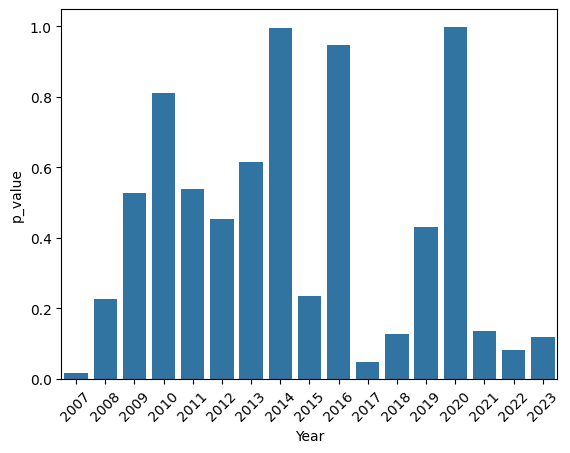

In [150]:
sns.barplot(kelp_shannon_mw_df, x='Year', y='p_value')
plt.xticks(rotation=45)
plt.show()

<mark style="background-color: lightblue"> We can see that there is a low p-value for 2017 data, and some interesting values for 2022. </mark>

2017 is comparing 2016 and 2018. Let's compare visually.

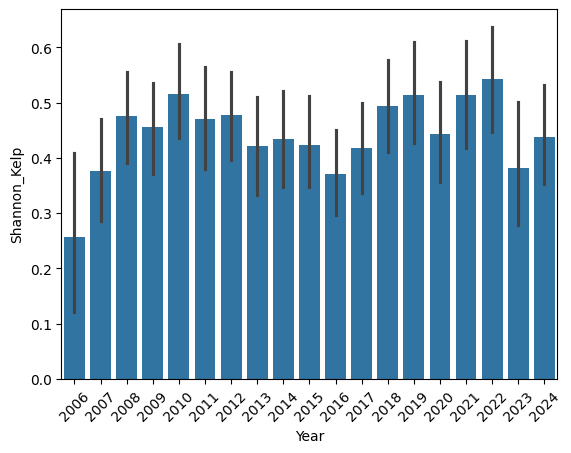

In [151]:
sns.barplot(eco_std, x='Year', y='Shannon_Kelp')
plt.xticks(rotation=45)
plt.show()

#### **Now for Inverts**

In [152]:
invert_shannon_mw = moving_window_ttest(eco_std, 'Year', 'Shannon_Invert')
invert_shannon_mw
##ignore 2007, Reef Check was just starting

[[2007, -3.1074782326543775, 0.004177873247800318],
 [2008, 0.02800456565861743, 0.9777031990927889],
 [2009, 0.08396343607721816, 0.9332023210992271],
 [2010, -0.3885370952205604, 0.6981770363804652],
 [2011, -1.407165693793362, 0.1614240157129632],
 [2012, -0.03780590772204391, 0.9698984613905957],
 [2013, 0.6395974346134476, 0.5234229561659426],
 [2014, 0.4815179928254984, 0.6310010602581451],
 [2015, 1.462146440710329, 0.14582358256876443],
 [2016, 1.268332648780767, 0.2061764495573883],
 [2017, 0.3785719458647915, 0.7054424112645146],
 [2018, 0.7328869799615706, 0.46439025196926376],
 [2019, 0.32812562009435836, 0.7431437681804829],
 [2020, -0.49661902406922404, 0.6199844038319906],
 [2021, 0.06660715174126168, 0.946956457109688],
 [2022, 2.4661384084016453, 0.014673712721206711],
 [2023, 0.7026866436967372, 0.48310181477459824]]

In [153]:
invert_shannon_mw_df = pd.DataFrame(invert_shannon_mw).rename(columns={0:'Year', 1:'t_stat',2:'p_value'})
invert_shannon_mw_df

,Year,t_stat,p_value
0,2007,-3.107478,0.004178
1,2008,0.028005,0.977703
2,2009,0.083963,0.933202
3,2010,-0.388537,0.698177
4,2011,-1.407166,0.161424
5,2012,-0.037806,0.969898
6,2013,0.639597,0.523423
7,2014,0.481518,0.631001
8,2015,1.462146,0.145824
9,2016,1.268333,0.206176


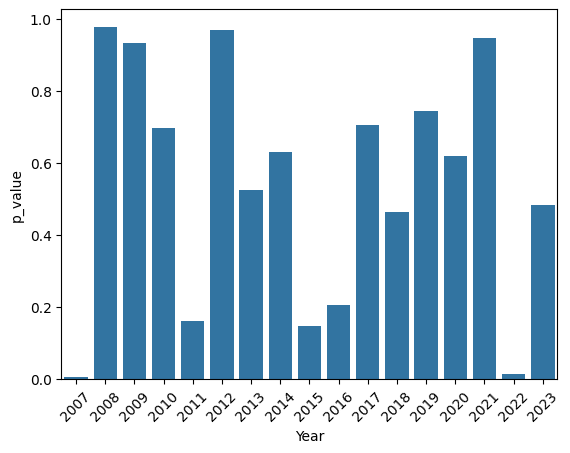

In [154]:
sns.barplot(invert_shannon_mw_df, x='Year', y='p_value')
plt.xticks(rotation=45)
plt.show()

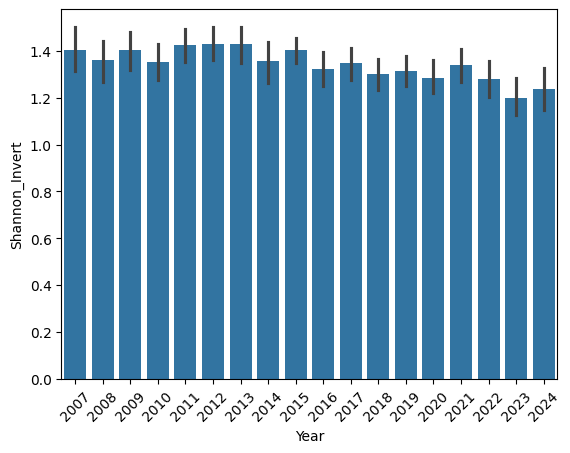

In [169]:
sns.barplot(eco_std[eco_std.Year>2006], x='Year', y='Shannon_Invert')
plt.xticks(rotation=45)
plt.show()

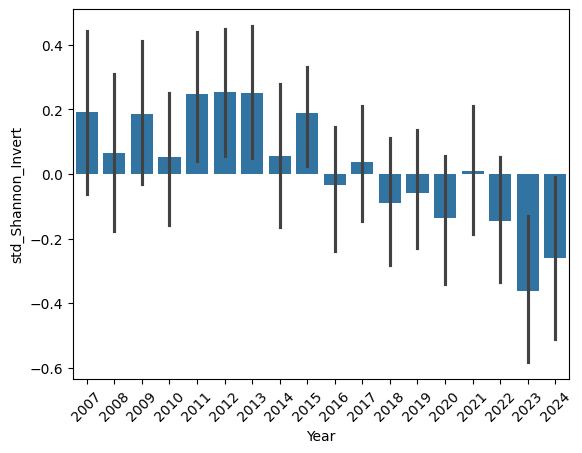

In [171]:
##easier to see with standards
sns.barplot(eco_std[eco_std.Year>2006], x='Year', y='std_Shannon_Invert')
plt.xticks(rotation=45)
plt.show()
##dropped 2006, ReefCheck getting started and has falsely low values

**Upon inspection, it looks as though the reason 2015 jumps out is because this is where there was a rebound in the population before a decrease continued. In 2013 it was high, 2014 low but not at the overall mean, 2015 almost high again, 2016 below mean, 2017 just above mean, 2018 through 2020 below mean, 2021 above mean, 2022 below mean, 2023 very below mean, and 2024 below mean**

Clearly a trend

In [79]:
## Regex for Indentifying Invert parameters
[re.findall(r'([A-Za-z]+.*)_Invert',i) for i in columns_eco];

In [78]:
## Regex for Identifying Kelp parameters
[re.findall(r'([A-Za-z]+.*)_Kelp',i) for i in columns_eco];

# Summary Dataframes for Statistical Analysis

## For Counts of Species of Interest

In [172]:
invert_rcca_group = pd.read_csv('invert_rcca_group.csv')
kelp_rcca_group = pd.read_csv('kelp_rcca_group.csv')
display(invert_rcca_group.head(3), kelp_rcca_group.head(3))

,Site,Latitude,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Classcode,Amount,Distance,Area_m2,Total_Count_Site,species_presence
0,120 Reef,33.737919,2006-10-01,2006,Oct,1,Oct-01,732585,274,Bat Star,35,180.0,360.0,805,True
1,120 Reef,33.737919,2006-10-01,2006,Oct,1,Oct-01,732585,274,Black Abalone,0,180.0,360.0,805,False
2,120 Reef,33.737919,2006-10-01,2006,Oct,1,Oct-01,732585,274,Brown/Golden Gorgonian,80,178.0,356.0,805,True


,Site,Latitude,Date,Year,Classcode,Amount,Stipes,Total,Distance,Area_m2,Species_Density,Dateordinal,Total_Count_Site,n_n1,pi_lnpi,species_presence
0,120 Reef,33.737919,2006-10-01,2006,Giant Kelp,9,63.0,63.0,360.0,720.0,0.0875,732585,63.0,3906.0,0.0,True
1,120 Reef,33.737919,2006-10-01,2006,Laminaria Spp,0,0.0,0.0,180.0,360.0,0.0000,732585,63.0,-0.0,NaN,False
2,120 Reef,33.737919,2006-10-01,2006,Southern Sea Palm >30,0,0.0,0.0,180.0,360.0,0.0000,732585,63.0,-0.0,NaN,False


## For Ecological Parameters
(Simpsons Diversity Index, Shannons Diversity Index, Richness)

In [173]:
eco_std

,Site,Latitude,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Total_Count_Site_Invert,...,std_Simpsons_Invert,std_Shannon_Invert,std_Richness_Invert,Total_Count_Site_Kelp,Simpsons_Kelp,Shannon_Kelp,Richness_Kelp,std_Simpsons_Kelp,std_Shannon_Kelp,std_Richness_Kelp
0,120 Reef,33.737919,2006-10-01,2006,Oct,1,Oct-01,732585,274,805,...,0.566938,0.344281,-0.107075,63.0,0.000000,0.000000,1.0,-1.025408,-1.041572,-1.018754
1,120 Reef,33.737919,2007-08-19,2007,Aug,19,Aug-19,732907,231,969,...,1.174410,1.512614,1.400993,260.0,0.030502,0.088138,3.0,-0.903931,-0.840117,0.174869
2,120 Reef,33.737919,2008-08-23,2008,Aug,23,Aug-23,733277,236,730,...,0.761831,0.726857,0.646959,713.0,0.000000,0.000000,1.0,-1.025408,-1.041572,-1.018754
3,120 Reef,33.737919,2009-06-07,2009,Jun,7,Jun-07,733565,158,622,...,1.411588,1.769918,1.778010,1070.0,0.020410,0.063310,3.0,-0.944121,-0.896867,0.174869
4,120 Reef,33.737919,2010-08-01,2010,Aug,1,Aug-01,733985,213,768,...,0.802008,0.960595,1.023976,651.0,0.364641,0.639033,4.0,0.426823,0.419042,0.771681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583,Yellowbanks,33.998798,2009-10-29,2009,Oct,29,Oct-29,733709,302,211,...,0.737616,0.795167,0.269942,614.0,0.521603,0.834675,3.0,1.051943,0.866213,0.174869
1584,Yellowbanks,33.998798,2010-11-17,2010,Nov,17,Nov-17,734093,321,192,...,0.525693,0.379120,-0.861108,1150.0,0.332471,0.588510,4.0,0.298699,0.303563,0.771681
1585,Yellowbanks,33.998798,2011-08-19,2011,Aug,19,Aug-19,734368,231,374,...,0.330661,0.608398,0.646959,908.0,0.525786,0.873590,3.0,1.068602,0.955159,0.174869
1586,Yellowbanks,33.998798,2012-07-24,2012,Jul,24,Jul-24,734708,206,267,...,1.283620,1.849940,1.023976,1263.0,0.365035,0.663190,3.0,0.428392,0.474257,0.174869


## For Water Temperature Data
(Sea Surface Temperature and Sea Surface Temperature Anomalies)

In [219]:
sst_df = pd.read_csv('water_temp.csv')
sst_df['time_UTC'] = pd.to_datetime(sst_df['time_UTC'])
sst_df['time_UTC'] = sst_df['time_UTC'].dt.tz_convert('US/Pacific')
sst_df.rename(columns={'time_UTC':'Time'}, inplace=True)
sst_df['Date'] = pd.to_datetime(sst_df.Time.dt.date)
sst_df = sst_df[['Date','Time','sea_surface_temperature_degree_C']]
sst_anom_df = pd.read_csv('sst_anomaly_df.csv')
sst_anom_df['time_UTC'] = pd.to_datetime(sst_anom_df['time_UTC'])
sst_anom_df['time_UTC'] = sst_anom_df['time_UTC'].dt.tz_convert('US/Pacific')
sst_anom_df.rename(columns={'time_UTC':'Time'}, inplace=True)
sst_anom_df['Date'] = pd.to_datetime(sst_anom_df.Time.dt.date)
sst_anom_df = sst_anom_df[['Date','Time','sea_surface_temperature_anomaly_degree_C']]


In [220]:
display(sst_df.head(3), sst_anom_df.head(3))

,Date,Time,sea_surface_temperature_degree_C
0,2006-01-15,2006-01-15 16:00:00-08:00,12.33
1,2006-02-15,2006-02-15 16:00:00-08:00,11.32
2,2006-03-15,2006-03-15 16:00:00-08:00,11.00


,Date,Time,sea_surface_temperature_anomaly_degree_C
0,2006-01-15,2006-01-15 16:00:00-08:00,0.89
1,2006-02-15,2006-02-15 16:00:00-08:00,0.00
2,2006-03-15,2006-03-15 16:00:00-08:00,-0.19


# Get temp data into eco_std

In [221]:
temp_df = pd.merge(sst_df, sst_anom_df)
temp_df

,Date,Time,sea_surface_temperature_degree_C,sea_surface_temperature_anomaly_degree_C
0,2006-01-15,2006-01-15 16:00:00-08:00,12.33,0.89
1,2006-02-15,2006-02-15 16:00:00-08:00,11.32,0.00
2,2006-03-15,2006-03-15 16:00:00-08:00,11.00,-0.19
3,2006-04-15,2006-04-15 16:00:00-07:00,11.45,0.45
4,2006-05-15,2006-05-15 16:00:00-07:00,10.73,-0.39
...,...,...,...,...
226,2024-11-15,2024-11-15 16:00:00-08:00,12.76,0.58
227,2024-12-15,2024-12-15 16:00:00-08:00,12.69,0.94
228,2025-01-15,2025-01-15 16:00:00-08:00,11.66,0.21
229,2025-02-15,2025-02-15 16:00:00-08:00,11.02,-0.31


In [222]:
eco_std_short = eco_std.drop(columns=['Month','Day','Month_Day','Dateordinal','DayofYear'])
eco_std_short

,Site,Latitude,Date,Year,Total_Count_Site_Invert,Simpsons_Invert,Shannon_Invert,Richness_Invert,std_Simpsons_Invert,std_Shannon_Invert,std_Richness_Invert,Total_Count_Site_Kelp,Simpsons_Kelp,Shannon_Kelp,Richness_Kelp,std_Simpsons_Kelp,std_Shannon_Kelp,std_Richness_Kelp
0,120 Reef,33.737919,2006-10-01,2006,805,0.704441,1.461121,11,0.566938,0.344281,-0.107075,63.0,0.000000,0.000000,1.0,-1.025408,-1.041572,-1.018754
1,120 Reef,33.737919,2007-08-19,2007,969,0.798118,1.890908,15,1.174410,1.512614,1.400993,260.0,0.030502,0.088138,3.0,-0.903931,-0.840117,0.174869
2,120 Reef,33.737919,2008-08-23,2008,730,0.734495,1.601857,13,0.761831,0.726857,0.646959,713.0,0.000000,0.000000,1.0,-1.025408,-1.041572,-1.018754
3,120 Reef,33.737919,2009-06-07,2009,622,0.834693,1.985561,16,1.411588,1.769918,1.778010,1070.0,0.020410,0.063310,3.0,-0.944121,-0.896867,0.174869
4,120 Reef,33.737919,2010-08-01,2010,768,0.740690,1.687840,14,0.802008,0.960595,1.023976,651.0,0.364641,0.639033,4.0,0.426823,0.419042,0.771681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583,Yellowbanks,33.998798,2009-10-29,2009,211,0.730761,1.626985,12,0.737616,0.795167,0.269942,614.0,0.521603,0.834675,3.0,1.051943,0.866213,0.174869
1584,Yellowbanks,33.998798,2010-11-17,2010,192,0.698080,1.473937,9,0.525693,0.379120,-0.861108,1150.0,0.332471,0.588510,4.0,0.298699,0.303563,0.771681
1585,Yellowbanks,33.998798,2011-08-19,2011,374,0.668005,1.558280,13,0.330661,0.608398,0.646959,908.0,0.525786,0.873590,3.0,1.068602,0.955159,0.174869
1586,Yellowbanks,33.998798,2012-07-24,2012,267,0.814959,2.014998,14,1.283620,1.849940,1.023976,1263.0,0.365035,0.663190,3.0,0.428392,0.474257,0.174869


In [225]:
eco_temp_df = pd.merge(eco_std_short,temp_df)
eco_temp_df.columns

Index(['Site', 'Latitude', 'Date', 'Year', 'Total_Count_Site_Invert',
       'Simpsons_Invert', 'Shannon_Invert', 'Richness_Invert',
       'std_Simpsons_Invert', 'std_Shannon_Invert', 'std_Richness_Invert',
       'Total_Count_Site_Kelp', 'Simpsons_Kelp', 'Shannon_Kelp',
       'Richness_Kelp', 'std_Simpsons_Kelp', 'std_Shannon_Kelp',
       'std_Richness_Kelp', 'Time', 'sea_surface_temperature_degree_C',
       'sea_surface_temperature_anomaly_degree_C'],
      dtype='object')

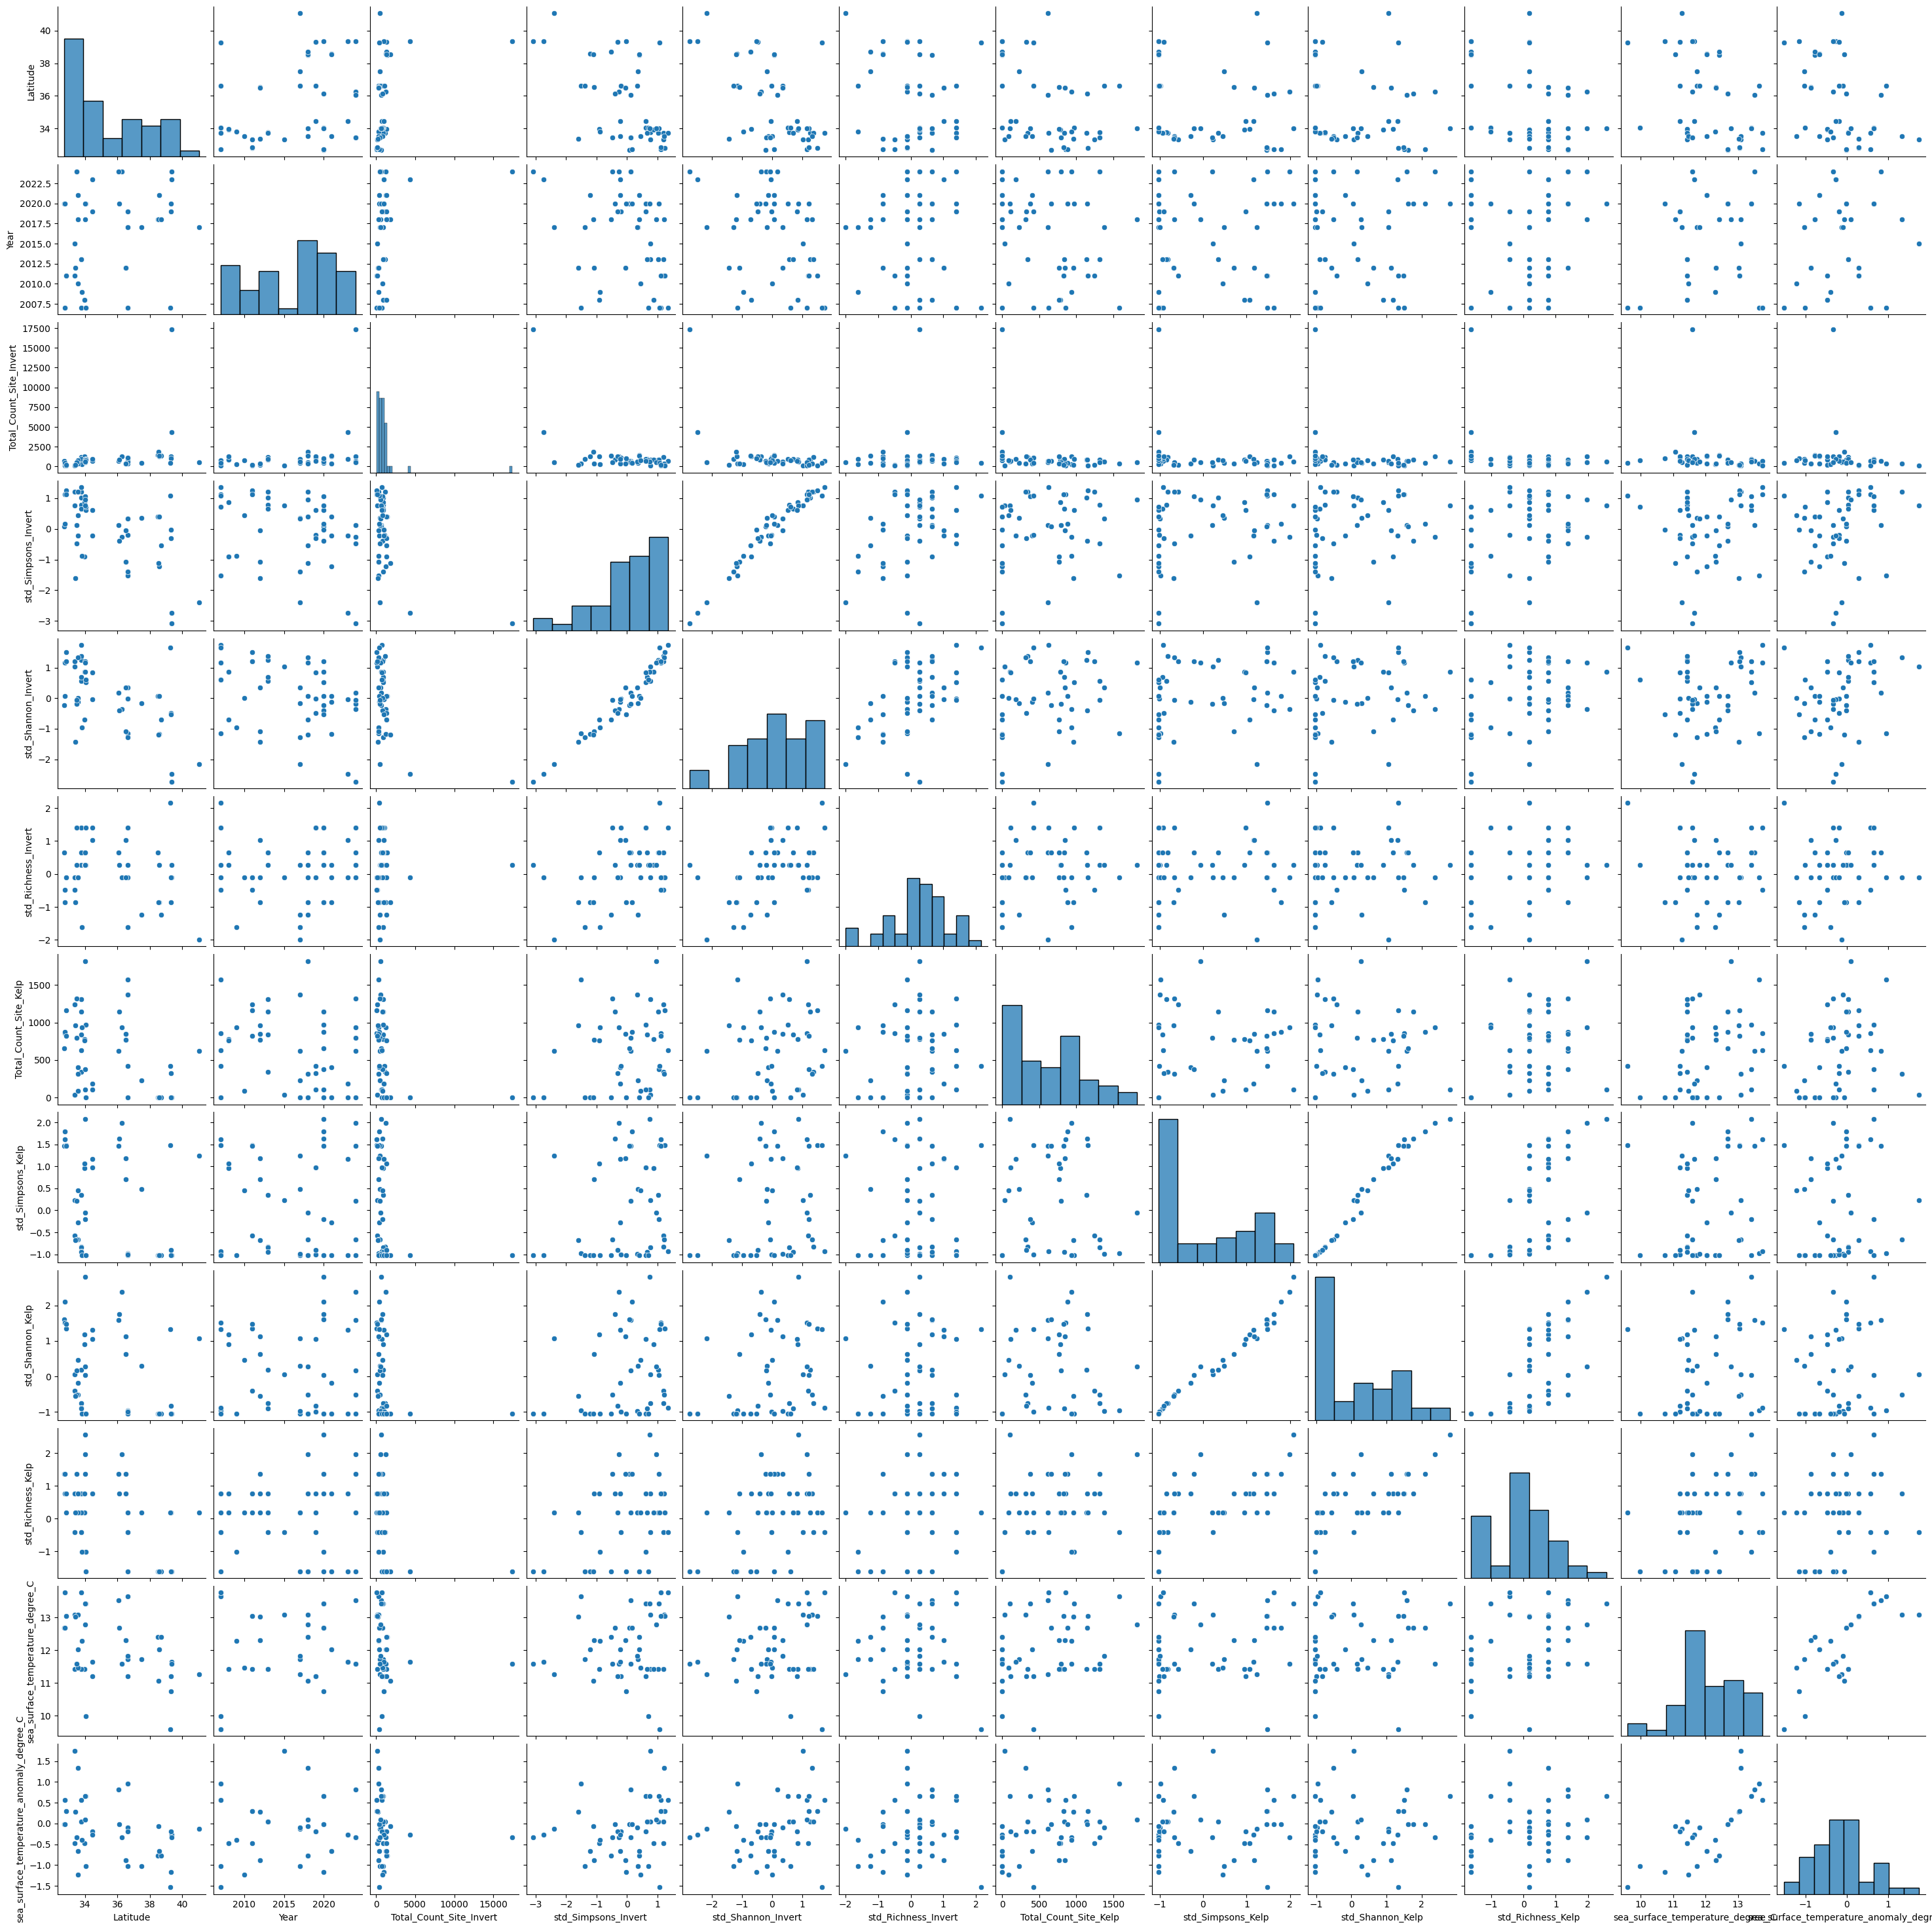

In [227]:
sns.pairplot(eco_temp_df[['Latitude','Date','Year','Total_Count_Site_Invert',
       'std_Simpsons_Invert', 'std_Shannon_Invert', 'std_Richness_Invert',
       'Total_Count_Site_Kelp','std_Simpsons_Kelp', 'std_Shannon_Kelp',
       'std_Richness_Kelp', 'sea_surface_temperature_degree_C',
       'sea_surface_temperature_anomaly_degree_C']])

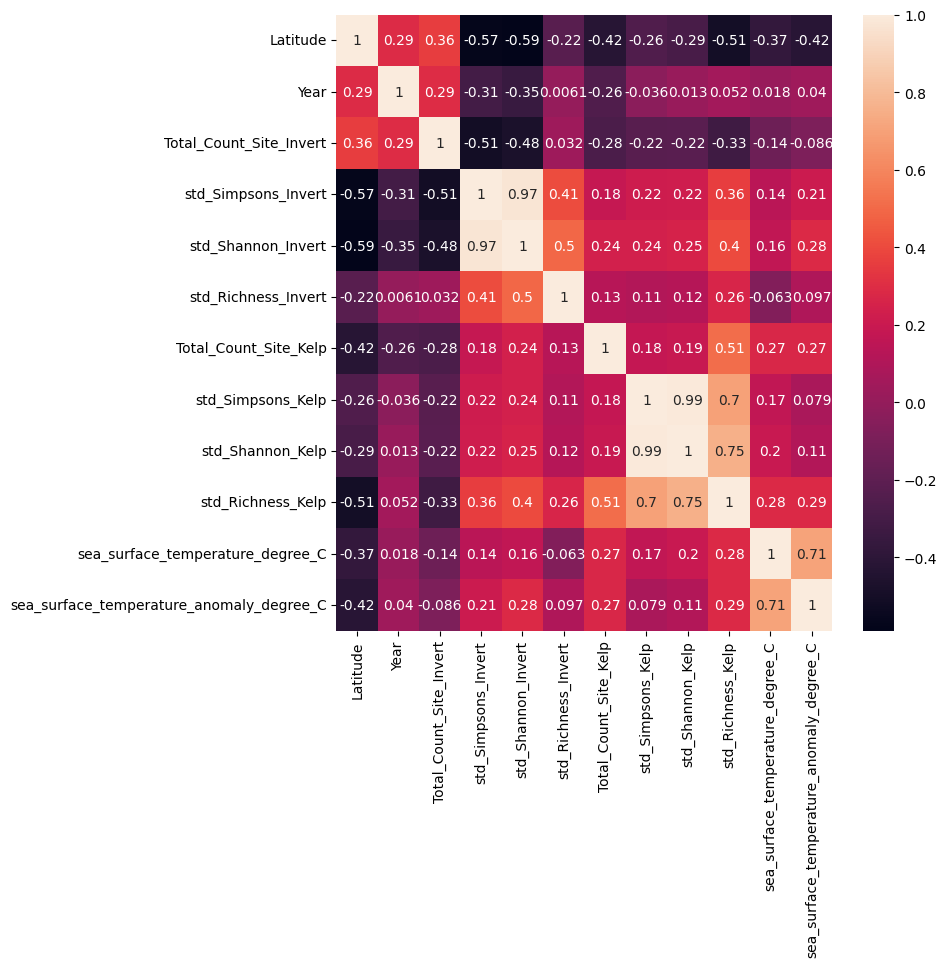

In [231]:
plt.figure(figsize=(8,8))
corrmat = eco_temp_df[['Latitude','Date','Year','Total_Count_Site_Invert',
       'std_Simpsons_Invert', 'std_Shannon_Invert', 'std_Richness_Invert',
       'Total_Count_Site_Kelp','std_Simpsons_Kelp', 'std_Shannon_Kelp',
       'std_Richness_Kelp', 'sea_surface_temperature_degree_C',
       'sea_surface_temperature_anomaly_degree_C']].corr(numeric_only=True)
sns.heatmap(data = corrmat, annot=True)
plt.show()